In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib

First clean run 

In [125]:
PH_data = pd.read_csv("/Users/Blaven/Desktop/Final Project 504/pothole_requests_datasd_v1 (1).csv")
PH_data.head()

In [126]:
PH_data.shape

In [127]:
list(PH_data.columns)

In [ ]:
case_days=PH_data["case_age_days"].dropna()
case_days=case_days.abs()
temp1=case_days.unique().tolist()

In [ ]:
case_days.shape

In [ ]:
max(temp1)

In [ ]:
min(temp1)

In [ ]:
import matplotlib.pyplot as plt
case_days.hist(bins=100)

In [ ]:
84791-83463

In [ ]:
N_Var= PH_data[["service_request_id","case_age_days","status","case_record_type","comm_plan_name","case_origin","public_description"]]
N_Var.shape

(84791, 7)

In [ ]:
store2=PH_data["comm_plan_name"].dropna()
store2.shape

(84533,)

In [ ]:
N_Var=N_Var.dropna()
N_Var.shape

(75400, 7)

In [ ]:
discard = ["test"]

N_Var2=N_Var[~N_Var.public_description.str.contains('|'.join(discard))]
N_Var3=N_Var2[~N_Var2.public_description.str.contains("Test")]
N_Var4=N_Var3[~N_Var3.public_description.str.contains("TEST")]

In [ ]:
N_Var4.shape
#76892

(75240, 7)

In [ ]:
N_Var4["case_age_days"]=abs(N_Var4["case_age_days"])
N_Var4.shape

<ipython-input-8-5adb02b2b196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_Var4["case_age_days"]=abs(N_Var4["case_age_days"])


(75240, 7)

In [ ]:
N_Var4.to_csv('/Users/Blaven/Desktop/temp3.csv', index=False)

In [ ]:
N_Var4.drop_duplicates()


,service_request_id,case_age_days,status,case_record_type,comm_plan_name,case_origin,public_description
2,80518,18.0,Closed,TSW,Mid-City:Kensington-Talmadge,Phone,4000 block of copeland just before you get on ...
3,80531,5.0,Closed,TSW,Torrey Pines,Phone,LARGE P/H CAUSED VEHICLE DAMAGE
5,80543,31.0,Closed,TSW,Pacific Beach,Phone,Caller reports cracks and potholes in alley
6,80547,344.0,Closed,TSW,Clairemont Mesa,Phone,Pothole in left turn lane going toward school
8,80577,34.0,Closed,TSW,San Pasqual,Phone,POTHOLE
...,...,...,...,...,...,...,...
84786,3437781,1.0,New,TSW,La Jolla,Web,From Via Avola to Hidden Valley (going down th...
84787,3437850,1.0,In Process,TSW,Clairemont Mesa,Phone,S/B GENESEE RIGHT BEFORE THE 52 ON RAMP- POTHO...
84788,3437886,1.0,In Process,TSW,Mid-City:Eastern Area,Web,There needs to be street resurfacing done to t...
84789,3437965,1.0,In Process,TSW,Uptown,Mobile,Severe pothole at street and garage entrance o...


EDA

In [3]:
PH_data = pd.read_csv("/Users/georgegarcia/Desktop/504/final project/504_final-/temp3.csv")
PH_data.head()


,service_request_id,case_age_days,status,case_record_type,comm_plan_name,case_origin,public_description
0,80518,18,Closed,TSW,Mid-City:Kensington-Talmadge,Phone,4000 block of copeland just before you get on ...
1,80531,5,Closed,TSW,Torrey Pines,Phone,LARGE P/H CAUSED VEHICLE DAMAGE
2,80543,31,Closed,TSW,Pacific Beach,Phone,Caller reports cracks and potholes in alley
3,80547,344,Closed,TSW,Clairemont Mesa,Phone,Pothole in left turn lane going toward school
4,80577,34,Closed,TSW,San Pasqual,Phone,POTHOLE


In [4]:
PH_data.shape

(75240, 7)

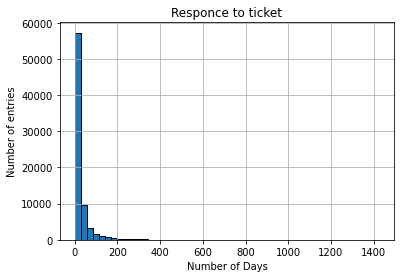

In [5]:
import matplotlib.pyplot as plt
PH_data.case_age_days.hist(bins=50,edgecolor = 'black')
plt.ylabel("Number of entries")
plt.xlabel("Number of Days")
plt.title("Responce to ticket")
plt.show()
# very right skewed will have to normalize the data

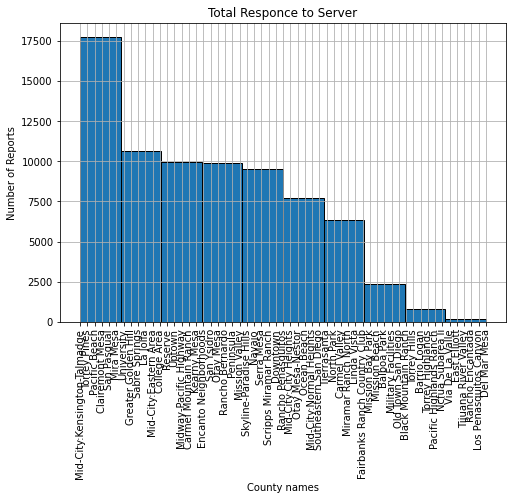

In [ ]:
plt.rcParams["figure.figsize"] = (8,5.5)
PH_data.comm_plan_name.hist(edgecolor = 'black')
plt.xticks(rotation='vertical')
plt.ylabel("Number of Reports")
plt.xlabel("County names")
plt.title("Total Responce to Server")
plt.show()

<AxesSubplot:title={'center':'Device Report'}, xlabel='Type of Device ', ylabel='Number of Reports by Device'>

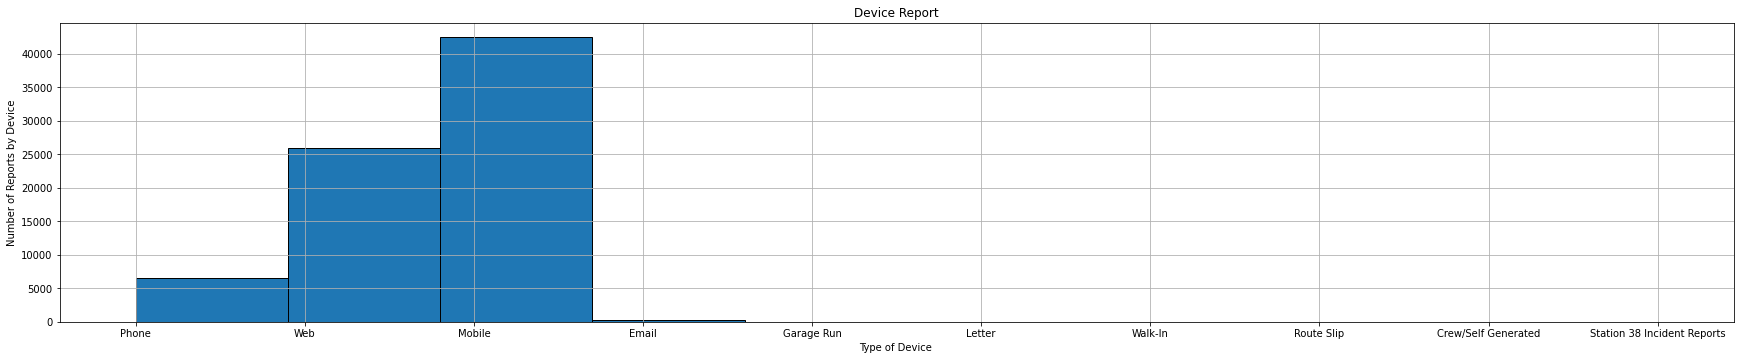

In [5]:
plt.rcParams["figure.figsize"] = (30,5.5)
plt.ylabel("Number of Reports by Device")
plt.xlabel("Type of Device ")
plt.title("Device Report")
PH_data.case_origin.hist(edgecolor = 'black')

Text(0.5, 1.0, 'Responsibility of Reporting to Pothole')

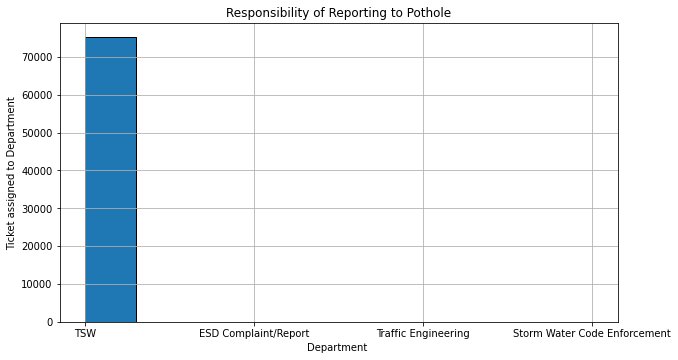

In [ ]:
plt.rcParams["figure.figsize"] = (10,5.5)
PH_data.case_record_type.hist(edgecolor = 'black')
plt.ylabel("Ticket assigned to Department")
plt.xlabel("Department ")
plt.title("Responsibility of Reporting to Pothole")
# TSW has a heavy influence than the others that you cant see the values
# down scale after test split

In [6]:
PH_data["case_record_type"].value_counts()

TSW                             75223
Traffic Engineering                11
Storm Water Code Enforcement        5
ESD Complaint/Report                1
Name: case_record_type, dtype: int64

<AxesSubplot:title={'center':'Cases Status'}, xlabel='Status ', ylabel='Number of tickets'>

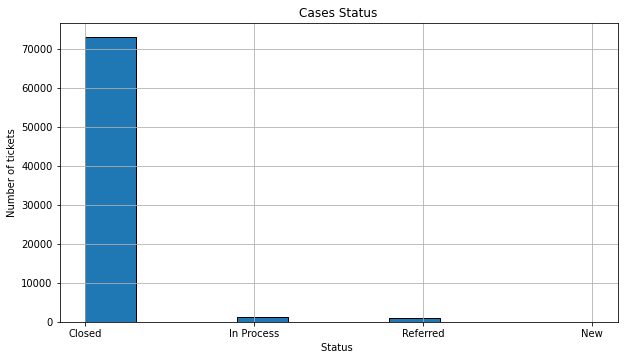

In [7]:
plt.rcParams["figure.figsize"] = (10,5.5)
plt.ylabel("Number of tickets")
plt.xlabel("Status ")
plt.title("Cases Status")
PH_data.status.hist(edgecolor = 'black')
# down scale the Closed after test split

In [8]:
PH_data["status"].value_counts()

Closed        73042
In Process     1245
Referred        950
New               3
Name: status, dtype: int64

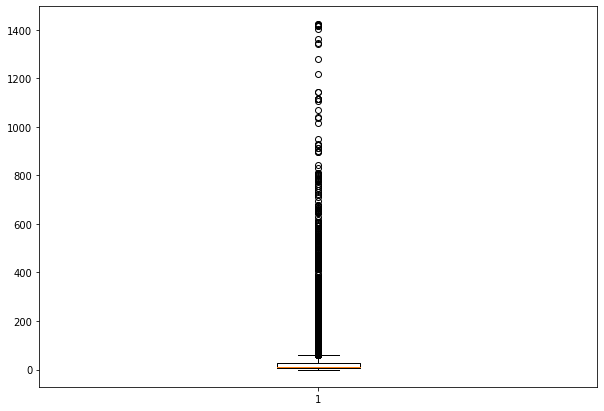

In [9]:
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(PH_data.case_age_days)
 
# show plot
plt.show()

# probally redoit after normalize

[0.0, 60.0]

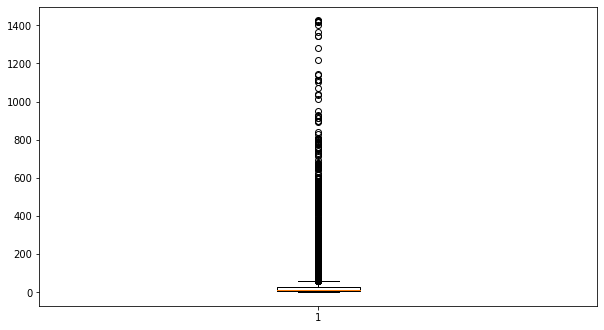

In [ ]:
B = plt.boxplot(PH_data.case_age_days)
[item.get_ydata()[1] for item in B['whiskers']]
# dropping the outlier that is outside of 60 day mark

In [10]:
df_filtered = PH_data[PH_data['case_age_days'] < 61]
  
  
# Print the shape of the dataframe
df_filtered.shape

(67245, 7)

In [11]:
df_filtered.head(10)

,service_request_id,case_age_days,status,case_record_type,comm_plan_name,case_origin,public_description
0,80518,18,Closed,TSW,Mid-City:Kensington-Talmadge,Phone,4000 block of copeland just before you get on ...
1,80531,5,Closed,TSW,Torrey Pines,Phone,LARGE P/H CAUSED VEHICLE DAMAGE
2,80543,31,Closed,TSW,Pacific Beach,Phone,Caller reports cracks and potholes in alley
4,80577,34,Closed,TSW,San Pasqual,Phone,POTHOLE
5,80582,6,Closed,TSW,Mira Mesa,Web,Road damage that needsTo be repaired
6,80838,17,Closed,TSW,Pacific Beach,Web,"Substantial pothole on westbound Grand Ave, in..."
7,80844,12,Closed,TSW,University,Web,Pothole in street
8,80848,5,Closed,TSW,Clairemont Mesa,Web,on corner of appleton and genesee
10,80892,12,Closed,TSW,Sabre Springs,Web,Numerous potholes in pavement both westbound a...
11,80895,12,Closed,TSW,Sabre Springs,Web,many bad potholes SB Sabre Springs between Pow...


In [155]:
df_filtered['case_record_type'].unique


<bound method Series.unique of 0        TSW
1        TSW
2        TSW
4        TSW
5        TSW
        ... 
75235    TSW
75236    TSW
75237    TSW
75238    TSW
75239    TSW
Name: case_record_type, Length: 67245, dtype: object>

In [156]:
df_filtered.case_age_days.value_counts()

1     4720
2     3958
3     3531
4     3463
5     3372
      ... 
54     186
57     167
60     150
58     133
59     121
Name: case_age_days, Length: 61, dtype: int64

In [12]:
df_filtered.describe()
temp4=df_filtered

In [13]:
temp4["case_record_type"]=temp4["case_record_type"].str.replace('ESD Complaint/Report','Specialty')
temp4["case_record_type"]=temp4["case_record_type"].str.replace('Traffic Engineering','Specialty')
temp4["case_record_type"]=temp4["case_record_type"].str.replace('Storm Water Code Enforcement','Specialty')

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [159]:
pd.unique(temp4["status"])

array(['Closed', 'Referred', 'In Process', 'New'], dtype=object)

In [14]:
temp4["status"]=temp4["status"].str.replace('New','Open')
temp4["status"]=temp4["status"].str.replace('Referred','Open')
temp4["status"]=temp4["status"].str.replace('In Process','Open')

In [15]:
temp4

,service_request_id,case_age_days,status,case_record_type,comm_plan_name,case_origin,public_description
0,80518,18,Closed,TSW,Mid-City:Kensington-Talmadge,Phone,4000 block of copeland just before you get on ...
1,80531,5,Closed,TSW,Torrey Pines,Phone,LARGE P/H CAUSED VEHICLE DAMAGE
2,80543,31,Closed,TSW,Pacific Beach,Phone,Caller reports cracks and potholes in alley
4,80577,34,Closed,TSW,San Pasqual,Phone,POTHOLE
5,80582,6,Closed,TSW,Mira Mesa,Web,Road damage that needsTo be repaired
...,...,...,...,...,...,...,...
75235,3437781,1,Open,TSW,La Jolla,Web,From Via Avola to Hidden Valley (going down th...
75236,3437850,1,Open,TSW,Clairemont Mesa,Phone,S/B GENESEE RIGHT BEFORE THE 52 ON RAMP- POTHO...
75237,3437886,1,Open,TSW,Mid-City:Eastern Area,Web,There needs to be street resurfacing done to t...
75238,3437965,1,Open,TSW,Uptown,Mobile,Severe pothole at street and garage entrance o...


In [16]:
temp4["case_record_type"]=temp4["case_record_type"].str.replace('TSW','1')
temp4["case_record_type"]=temp4["case_record_type"].str.replace('Specialty','0')

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
temp4["case_record_type"]=temp4['case_record_type'].astype(float)

In [18]:
temp4

,service_request_id,case_age_days,status,case_record_type,comm_plan_name,case_origin,public_description
0,80518,18,Closed,1.0,Mid-City:Kensington-Talmadge,Phone,4000 block of copeland just before you get on ...
1,80531,5,Closed,1.0,Torrey Pines,Phone,LARGE P/H CAUSED VEHICLE DAMAGE
2,80543,31,Closed,1.0,Pacific Beach,Phone,Caller reports cracks and potholes in alley
4,80577,34,Closed,1.0,San Pasqual,Phone,POTHOLE
5,80582,6,Closed,1.0,Mira Mesa,Web,Road damage that needsTo be repaired
...,...,...,...,...,...,...,...
75235,3437781,1,Open,1.0,La Jolla,Web,From Via Avola to Hidden Valley (going down th...
75236,3437850,1,Open,1.0,Clairemont Mesa,Phone,S/B GENESEE RIGHT BEFORE THE 52 ON RAMP- POTHO...
75237,3437886,1,Open,1.0,Mid-City:Eastern Area,Web,There needs to be street resurfacing done to t...
75238,3437965,1,Open,1.0,Uptown,Mobile,Severe pothole at street and garage entrance o...


In [19]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [23]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
temp4["comm_plan_name"] = labelencoder.fit_transform(temp4["comm_plan_name"])
temp5=temp4.drop(columns=['case_origin','public_description','service_request_id'])

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


#delet

In [121]:
cat_feat = df_filtered[['case_age_days', 'case_record_type','comm_plan_name']]

X= cat_feat
y= df_filtered[['status']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5,random_state=42)
balanced_model = make_pipeline(OneHotEncoder(),Perceptron(class_weight='balanced'))

In [22]:
!pip install imbalanced-learn

In [132]:

cat_feat = temp4[['case_age_days', 'case_record_type','comm_plan_name']]

X= cat_feat
y= df_filtered[['status']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5,random_state=42)

balanced_model = make_pipeline(OneHotEncoder(),Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(OneHotEncoder(), Perceptron())

# fit the models here:
balanced_model.fit(X_train, y_train)
unbalanced_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('perceptron', Perceptron())])

In [135]:

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)


#Train the classifier.
dt=bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:

dt_scores = cross_val_score(dt, X, y, cv = 10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_b

In [138]:
dt_scores

array([0.79598513, 0.78527881, 0.786171  , 0.79553903, 0.81516729,
       0.82064247, 0.80606782, 0.8356633 , 0.79967281, 0.78985723])

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
accuracy

0.8220265889420932

Confusion Matrix for the Decision Tree

In [28]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[27058  5717]
 [  267   581]]


In [29]:

from imblearn.over_sampling import SMOTE

In [30]:
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

In [31]:
X_balanced, y_balanced = sm.fit_resample(temp5.drop('status', axis=1), temp5['status'])

In [32]:
oversampled_train = pd.concat([pd.DataFrame(y_balanced), pd.DataFrame(X_balanced)], axis=1)

In [33]:
oversampled_train.columns = temp5.columns

In [34]:
oversampled_train

,case_age_days,status,case_record_type,comm_plan_name
0,Closed,18,1.0,19
1,Closed,5,1.0,53
2,Closed,31,1.0,35
3,Closed,34,1.0,43
4,Closed,6,1.0,23
...,...,...,...,...
131085,Open,21,1.0,14
131086,Open,12,1.0,33
131087,Open,4,1.0,28
131088,Open,0,1.0,0


<AxesSubplot:title={'center':'Case Response'}, ylabel='Number of entries'>

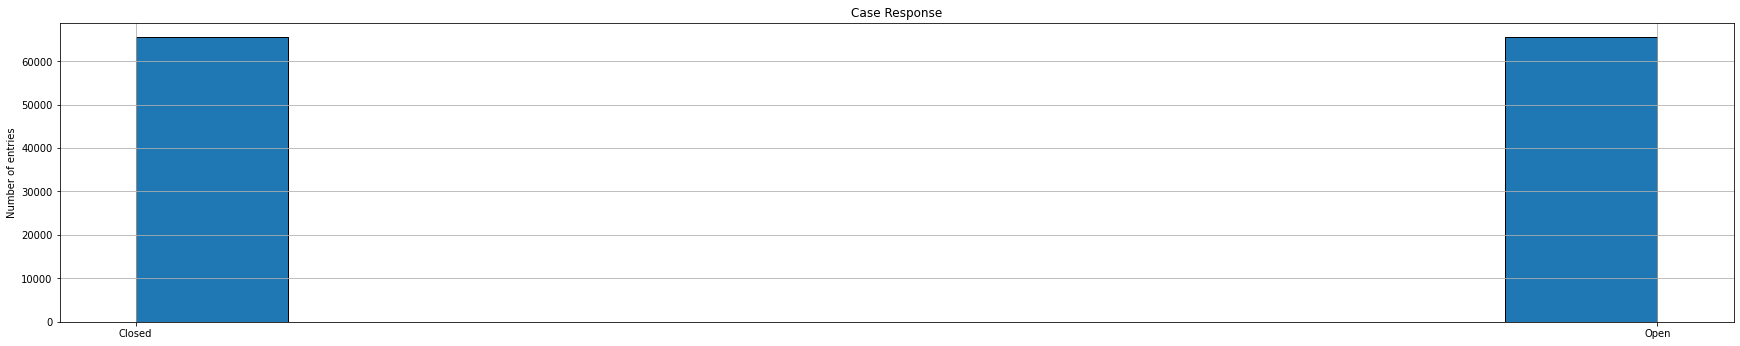

In [35]:
plt.rcParams["figure.figsize"] = (30,5.5)
plt.ylabel("Number of entries")
plt.title("Case Response")
oversampled_train.case_age_days.hist(edgecolor = 'black')

<AxesSubplot:xlabel='Department ', ylabel='Number of tickets assigined to department'>

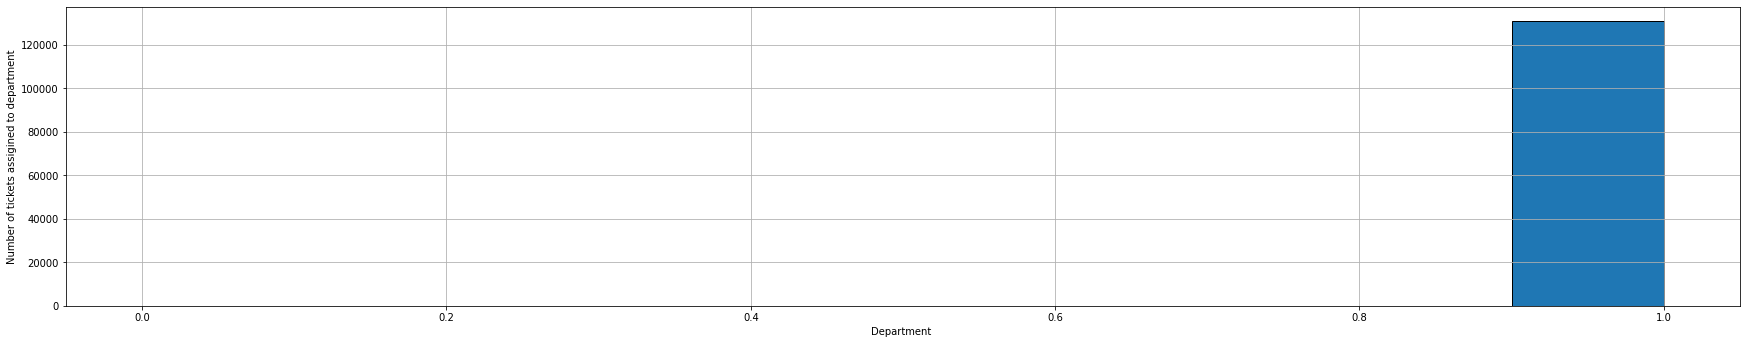

In [36]:
plt.rcParams["figure.figsize"] = (30,5.5)
plt.ylabel("Number of tickets assigined to department")
plt.xlabel("Department ")
oversampled_train.case_record_type.hist(edgecolor = 'black')

In [37]:
print(oversampled_train['case_record_type'].value_counts())

1.000000    130922
0.000000        34
0.499282         1
0.737740         1
0.325550         1
             ...  
0.311936         1
0.228770         1
0.543821         1
0.212396         1
0.660723         1
Name: case_record_type, Length: 136, dtype: int64


Preceptron

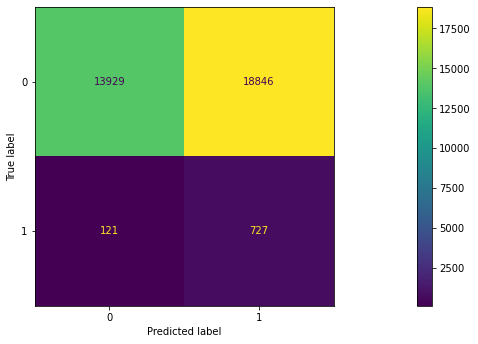

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = balanced_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=balanced_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=balanced_model.classes_)

disp.plot()
plt.show()

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.42      0.59     32775
           1       0.04      0.86      0.07       848

    accuracy                           0.44     33623
   macro avg       0.51      0.64      0.33     33623
weighted avg       0.97      0.44      0.58     33623



In [78]:
#adding the accruacy 
accuracy2 = accuracy_score(y_test, predictions)
accuracy2

0.43589209767123693

In [82]:
norm_scores = cross_val_score(balanced_model, X_test, y_test, cv=10,scoring='accuracy')
norm_scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selec

array([0.87048327, 0.72579926,        nan, 0.57480666, 0.89381321])

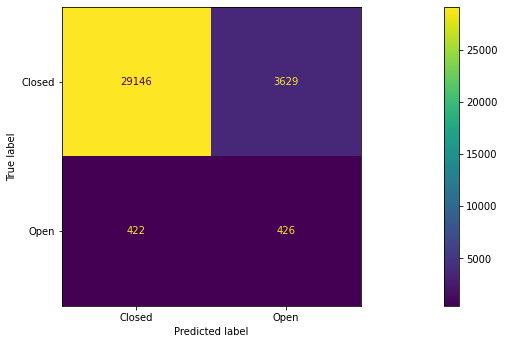

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = unbalanced_model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=balanced_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=balanced_model.classes_)
disp.plot()
plt.show()

In [50]:
corpus = temp4['public_description']
# Remove Outliers (records with no text data nans):
corpus=corpus.dropna()

corpus.describe()

count       67245
unique      55426
top       Pothole
freq         3770
Name: public_description, dtype: object

In [51]:
temp=temp4[['public_description','case_age_days']]
temp=temp.dropna()
temp

,public_description,case_age_days
0,4000 block of copeland just before you get on ...,18
1,LARGE P/H CAUSED VEHICLE DAMAGE,5
2,Caller reports cracks and potholes in alley,31
4,POTHOLE,34
5,Road damage that needsTo be repaired,6
...,...,...
75235,From Via Avola to Hidden Valley (going down th...,1
75236,S/B GENESEE RIGHT BEFORE THE 52 ON RAMP- POTHO...,1
75237,There needs to be street resurfacing done to t...,1
75238,Severe pothole at street and garage entrance o...,1


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
srb = vectorizer.fit_transform(corpus)
new_store=vectorizer.get_feature_names()
X1 = pd.DataFrame.sparse.from_spmatrix(srb, columns=new_store)
y1 = temp['case_age_days']
#train_test_split here
X_train, X_test, y_train, y_test =train_test_split(X1,y1,test_size=0.5,random_state=42)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func=chi2, k=10).fit(X_train, y_train)
print('Top 10 features %s' % X_train.columns[kbest.get_support()].tolist())

Top 10 features ['3939', 'bancook', 'chasewood', 'cinco', 'cover', 'guttet', 'mayo', 'oarta', 'restroom', 'rhonda']


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
data=X

In [56]:
data.head()

,case_age_days,case_record_type,comm_plan_name
0,18,1.0,19
1,5,1.0,53
2,31,1.0,35
4,34,1.0,43
5,6,1.0,23


Already done above

In [57]:
data.head()

,case_age_days,case_record_type,comm_plan_name
0,18,1.0,19
1,5,1.0,53
2,31,1.0,35
4,34,1.0,43
5,6,1.0,23


In [58]:
data['case_record_type'].value_counts()

1.0    67231
0.0       14
Name: case_record_type, dtype: int64

In [59]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data["comm_plan_name"] = labelencoder.fit_transform(data["comm_plan_name"])
data

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,case_age_days,case_record_type,comm_plan_name
0,18,1.0,19
1,5,1.0,53
2,31,1.0,35
4,34,1.0,43
5,6,1.0,23
...,...,...,...
75235,1,1.0,14
75236,1,1.0,5
75237,1,1.0,18
75238,1,1.0,55


In [60]:
data["case_record_type"]=data['case_record_type'].astype(float)

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [86]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
temp4["status"] = labelencoder.fit_transform(temp4["status"])

/Users/georgegarcia/Library/Python/3.9/lib/python/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [87]:
y2=temp4['status']
y2.head()

0    0
1    0
2    0
4    0
5    0
Name: status, dtype: int64

In [113]:
X1_train, X1_test, y1_train, y1_test =train_test_split(data, y2, test_size=0.2,random_state=42)

balanced_model = make_pipeline(OneHotEncoder(),Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(OneHotEncoder(), Perceptron())

# fit the models here:
balanced_model.fit(X1_train, y1_train)
unbalanced_model.fit(X1_train, y1_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('perceptron', Perceptron())])

In [114]:
#making the model
logisticRegr = LogisticRegression()


In [115]:
#applying the model 
logisticRegr.fit(X1_train, y1_train)

LogisticRegression()

In [116]:
predictions = logisticRegr.predict(X1_test)
# Use score method to get accuracy of model
score4 = logisticRegr.score(X1_test, y1_test)
print(score4)

0.9744218901033534


In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logisticRegr, X1_train, y1_train,cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.97472119 0.97472119 0.97472119 0.97472119 0.97472119 0.97472119
 0.9749024  0.9749024  0.9749024  0.9749024 ]


Making the confusion Matrix

In [118]:
y2_pred = logisticRegr.predict(X1_test)

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y2_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[13105     0]
 [  344     0]]


ROC Curve

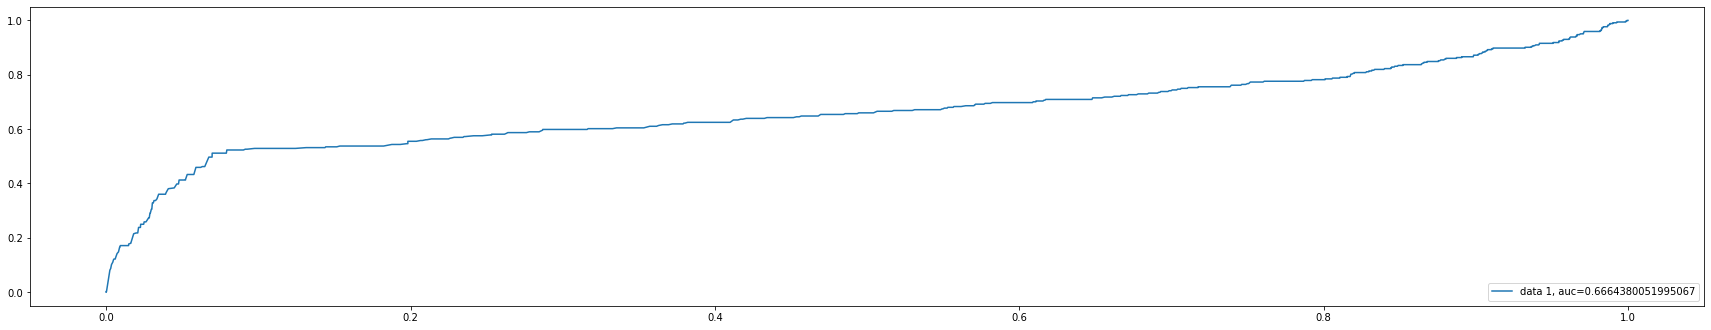

In [120]:
y_pred_proba = logisticRegr.predict_proba(X1_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y1_test,  y_pred_proba)
auc = metrics.roc_auc_score(y1_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ROC Decision tree

In [107]:

from sklearn.metrics import roc_curve, auc

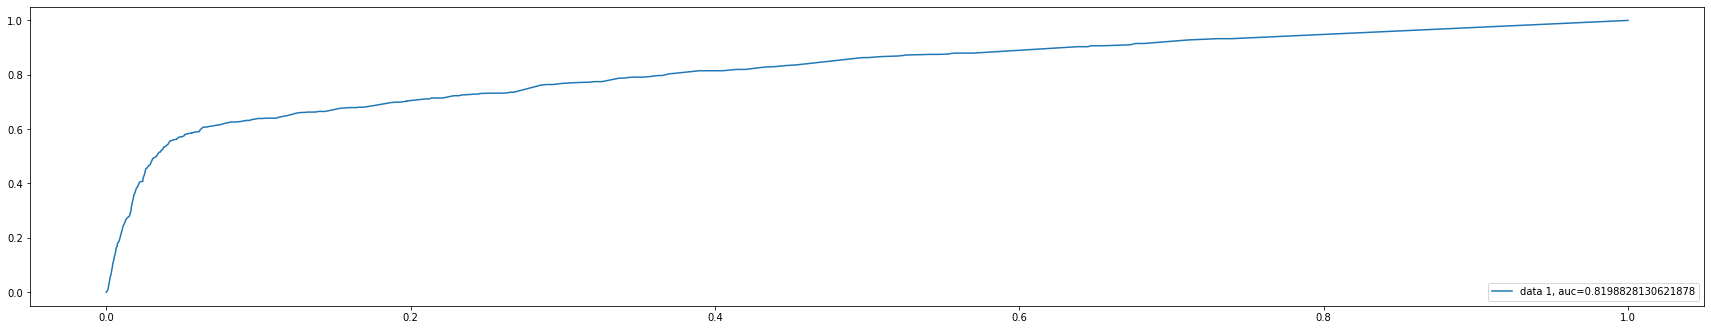

In [124]:
y_pred_proba = bbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()